In [89]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
from scipy import stats

import plotly.express as px
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.power import FTestPower


# EDA of Veg, Salad, and Fruits

This notebook focuses on the EDA of the veg, salad and fruits dataset. This analysis focuses on understanding the synthetic data sets generated for each group in order to build model(s) that classify plants according to conditions and once certain plants are selected based on conditions can predict yield of those plants. Each synthetic data set is generated for veg, salad and fruits with sample size 100, 300, 500 and 700, per plant, with a normal distribution. This notebook focuses on combining all three datasets into one dataset and will look at sample size 100 and 700. 


The EDA will be done in order to assess conditions that affect a plants growth and yield. 

Goals:
- Classify Plants Based on Conditions: Identify which plants can grow in given conditions.
- Predict Yield: Estimate the yield of plants once they are identified as suitable for the given conditions.

**Load and Combine Data sets**

In [12]:
pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 190.7 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
#Base path for the datasets
base_path = '/Users/kamiasalango/Desktop/Milan_Data_Urban_Ag/'

#File names
veg_100_file = 'synthetic_veg_normal_crop_data_100.xlsx'
fruit_100_file = 'synthetic_fruits_normal_crop_data_100.xlsx'
salad_100_file = 'synthetic_salads_normal_crop_data_100.xlsx'

veg_700_file = 'synthetic_veg_normal_crop_data_700.xlsx'
fruit_700_file = 'synthetic_fruits_normal_crop_data_700.xlsx'
salad_700_file = 'synthetic_salads_normal_crop_data_700.xlsx'

#Load the datasets using pd.read_excel
veg_100 = pd.read_excel(f'{base_path}{veg_100_file}')
fruit_100 = pd.read_excel(f'{base_path}{fruit_100_file}')
salad_100 = pd.read_excel(f'{base_path}{salad_100_file}')

veg_700 = pd.read_excel(f'{base_path}{veg_700_file}')
fruit_700 = pd.read_excel(f'{base_path}{fruit_700_file}')
salad_700 = pd.read_excel(f'{base_path}{salad_700_file}')


# Combine the datasets for 100 data points each
combined_100 = pd.concat([veg_100, fruit_100, salad_100], ignore_index=True)

# Combine the datasets for 700 data points each
combined_700 = pd.concat([veg_700, fruit_700, salad_700], ignore_index=True)

# Save the combined datasets if needed
combined_100.to_csv(f'{base_path}combined_100.csv', index=False)
combined_700.to_csv(f'{base_path}combined_700.csv', index=False)


In [4]:
combined100 = 'combined_100.csv'
combined700 = 'combined_700.csv'
df_100 = pd.read_csv(f'{base_path}{combined100}')
df_700 = pd.read_csv(f'{base_path}{combined700}')

In [6]:
df_100.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. no.           3400 non-null   int64  
 1   Name             3400 non-null   object 
 2   Soil_Type        3400 non-null   object 
 3   Fertility        3400 non-null   object 
 4   Photoperiod      3400 non-null   object 
 5   N-P-K Ratio      3400 non-null   object 
 6   Temperature      3400 non-null   float64
 7   Rainfall         3400 non-null   float64
 8   pH               3400 non-null   float64
 9   Light_Hours      3400 non-null   float64
 10  Light_Intensity  3400 non-null   float64
 11  Rh               3400 non-null   float64
 12  Nitrogen         3400 non-null   float64
 13  Phosphorus       3400 non-null   float64
 14  Potassium        3400 non-null   float64
 15  Yield            3400 non-null   float64
 16  Category_pH      3400 non-null   object 
 17  Season        

In [7]:
df_700.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. no.           23800 non-null  int64  
 1   Name             23800 non-null  object 
 2   Soil_Type        23800 non-null  object 
 3   Fertility        23800 non-null  object 
 4   Photoperiod      23800 non-null  object 
 5   N-P-K Ratio      23800 non-null  object 
 6   Temperature      23800 non-null  float64
 7   Rainfall         23800 non-null  float64
 8   pH               23800 non-null  float64
 9   Light_Hours      23800 non-null  float64
 10  Light_Intensity  23800 non-null  float64
 11  Rh               23800 non-null  float64
 12  Nitrogen         23800 non-null  float64
 13  Phosphorus       23800 non-null  float64
 14  Potassium        23800 non-null  float64
 15  Yield            23800 non-null  float64
 16  Category_pH      23800 non-null  object 
 17  Season      

## Data Dictionary
| Column Name       | Description                                               | Data Type    | Units        |
|-------------------|-----------------------------------------------------------|--------------|--------------|
| S. no.            | Serial number of the record                               | Integer      | -            |
| Name              | Name of the vegetable, fruit, or salad                    | String       | -            |
| Soil_Type         | Type of soil (e.g., Sandy Loam)                           | String       | -            |
| Fertility         | Soil fertility level (e.g., High)                         | String       | -            |
| Photoperiod       | Length of day period (e.g., Short Day Period)             | String       | -            |
| N-P-K Ratio       | Ratio of Nitrogen, Phosphorus, and Potassium in soil      | String       | -            |
| Temperature       | Temperature in degrees Celsius                            | Float        | °C           |
| Rainfall          | Amount of rainfall in millimeters                         | Float        | mm           |
| pH                | pH level of the soil                                      | Float        | -            |
| Light_Hours       | Number of light hours per day                             | Float        | hours        |
| Light_Intensity   | Intensity of light received in lumens                     | Float        | lumens       |
| Rh                | Relative humidity percentage                              | Float        | %            |
| Nitrogen          | Amount of nitrogen in the soil                            | Float        | ppm (mg/kg)  |
| Phosphorus        | Amount of phosphorus in the soil                          | Float        | ppm (mg/kg)  |
| Potassium         | Amount of potassium in the soil                           | Float        | ppm (mg/kg)  |
| Yield             | Yield of the vegetable, fruit, or salad in tons per hectare | Float      | tons/ha      |
| Category_pH       | pH category (e.g., low_acidic)                            | String       | -            |
| Season            | Growing season (e.g., Summer)                             | String       | -            |


In [8]:
df_100.head()

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield,Category_pH,Season
0,1,Tomatoes,Sandy Loam,High,Short Day Period,10:10:10,23.306988,517.516483,6.052500,6.864246,506.959629,53.708338,140.891076,167.147397,324.629219,61.119973,low_acidic,Summer
1,1,Tomatoes,Sandy Loam,High,Short Day Period,10:10:10,24.716167,512.407642,5.897924,7.278292,650.396870,55.158585,131.552392,161.231550,357.276092,61.220422,low_acidic,Summer
2,1,Tomatoes,Sandy Loam,High,Short Day Period,10:10:10,22.664179,481.068376,6.383434,7.048907,504.223870,58.770730,135.923113,161.769419,332.190124,61.361827,low_acidic,Spring
3,1,Tomatoes,Sandy Loam,High,Short Day Period,10:10:10,22.504446,506.471042,5.914541,7.596690,492.543607,55.069442,139.513255,162.326865,307.367536,63.840829,low_acidic,Spring
4,1,Tomatoes,Sandy Loam,High,Short Day Period,10:10:10,24.464564,432.479653,6.446970,7.208286,551.261454,55.920291,137.220959,173.383557,286.768747,64.637728,low_acidic,Spring


## Combined data set of 700 samples/plant

## General EDA

In [13]:
df_700.isnull().sum()

S. no.             0
Name               0
Soil_Type          0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Nitrogen           0
Phosphorus         0
Potassium          0
Yield              0
Category_pH        0
Season             0
dtype: int64

In [9]:
# Unique vegetables, salads and fruits

df_700['Name'].value_counts()


Name
Tomatoes          700
Arugula           700
Kiwi              700
Watermelon        700
Grapes            700
apricot           700
pear              700
plum              700
Beet              700
Eggplants         700
Chard             700
Cress             700
Endive            700
Kale              700
Lettuce           700
Radicchio         700
Lemon             700
Cherries          700
Figs              700
Strawberry        700
Blueberry         700
Peach             700
Pomegranate       700
Orange            700
Apple             700
Green Peas        700
Broccoli          700
Cauliflowers      700
Potatoes          700
Cucumbers         700
Cabbage           700
Chilli Peppers    700
Asparagus         700
Spinach           700
Name: count, dtype: int64

**N-P-K Ratio**

In [14]:
df_700['N-P-K Ratio'].value_counts()

N-P-K Ratio
10:10:10               7700
2010-10-10 00:00:00    7000
05:10:10               2100
2005-10-05 00:00:00    1400
2020-10-20 00:00:00     700
2010-10-05 00:00:00     700
2006-06-06 00:00:00     700
75:37.5:37.5            700
05:10:05                700
22:12:13                700
08:15:36                700
13:13:13                700
Name: count, dtype: int64

In [19]:
#Function to correct NPK ratios, as some are in date format
def correct_npk_ratio(value):
    if isinstance(value, str):
        # Check for date format 'YYYY-MM-DD HH:MM:SS'
        if re.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}', value):
            date_parts = value.split(' ')[0].split('-')
            return f'{int(date_parts[0][2:]):02}:{int(date_parts[1]):02}:{int(date_parts[2]):02}'
        else:
            return value  # Already in correct format or other format
    else:
        return value

In [22]:
#apply function
df_700['N-P-K Ratio'] = df_700['N-P-K Ratio'].apply(correct_npk_ratio)

In [23]:
#convert column to string
df_700['N-P-K Ratio'] = df_700['N-P-K Ratio'].astype(str)

In [24]:
df_700['N-P-K Ratio'].value_counts()

N-P-K Ratio
10:10:10        14700
05:10:10         2100
05:10:05         2100
20:10:20          700
10:10:05          700
06:06:06          700
75:37.5:37.5      700
22:12:13          700
08:15:36          700
13:13:13          700
Name: count, dtype: int64

**Soil Type**

In [25]:
df_700['Soil_Type'].value_counts()

Soil_Type
Loamy         15389
Sandy Loam     3873
Sandy loam     3511
Sandy           700
Loam            327
Name: count, dtype: int64

It is unclear as to what exactly Loamy soil type is refferring to here, see https://www.vedantu.com/geography/loam 

Here is a possible interpretation of soil types; 

- Loamy vs. Loam:

    - Loamy: Generally refers to soil that has a balanced mixture of sand, silt, and clay. The term "loamy" can also be used as an adjective to describe various types of loam soils that contain sand particles, leading to different sub-classifications.
    - Loam: Specifically refers to an equal mixture of the three soil types (sand, silt, and clay). It provides good fertility, structure, and drainage.
- Sandy Loam vs. Loamy Sandy:

    -Sandy Loam: Dominated by sand particles but contains enough clay and silt to provide structure and fertility. It is subdivided based on the sand particle size.
    -Loamy Sandy: A term often used to describe loam that has a higher proportion of sand particles. It is similar to sandy loam but emphasizes the sand content within the loam mixture.

Soil Type Classification

- Loamy: Can be considered equivalent to "Loam" in the context of your data. It has a balanced mixture of sand, silt, and clay.
- Loam: An equal mixture of sand, silt, and clay.
- Sandy Loam: Dominated by sand particles but contains enough clay and silt for structure and fertility.
- Sandy: Predominantly sand with minimal silt and clay content.


Based on the above information, for this analysis the data will be standardized to 

- Loam (including Loamy)
- Sandy Loam
- Sandy

In [26]:
#standardize soil types
df_700['Soil_Type'] = df_700['Soil_Type'].replace({
    'Loamy': 'Loam',
    'Sandy loam': 'Sandy Loam'
})

In [27]:
df_700['Soil_Type'].value_counts()

Soil_Type
Loam          15716
Sandy Loam     7384
Sandy           700
Name: count, dtype: int64

**Fertility**

In [28]:
df_700['Fertility'].value_counts()

Fertility
High        14000
Moderate     6300
moderate     3500
Name: count, dtype: int64

In [29]:
#correct moderate and Moderate
df_700['Fertility'] = df_700['Fertility'].replace({'moderate': 'Moderate'})

In [30]:
df_700['Fertility'].value_counts()

Fertility
High        14000
Moderate     9800
Name: count, dtype: int64

**Photoperiod**

In [31]:
df_700['Photoperiod'].value_counts()

Photoperiod
Short Day Period    15792
Day Neutral          6943
Long Day Period      1065
Name: count, dtype: int64

**Category pH**

In [32]:
df_700['Category_pH'].value_counts()

Category_pH
low_acidic      13464
neutral          6714
acidic           2100
low_alkaline     1522
Name: count, dtype: int64

**Season**

In [33]:
df_700['Season'].value_counts()

Season
Spring    7946
Fall      7730
Summer    6742
Winter    1382
Name: count, dtype: int64

**Continuos Variables**
Basic Stats

In [34]:
df_700.describe()

,S. no.,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Nitrogen,Phosphorus,Potassium,Yield
count,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000,23800.000000
mean,6.676471,21.978474,1048.775960,6.238701,10.708792,428.144454,75.633995,143.077870,97.729048,178.380374,17.792950
std,3.778661,4.382708,372.439104,0.836081,2.705223,210.594866,19.199301,60.180291,69.558537,90.676584,14.503704
min,1.000000,9.355908,409.927161,2.940351,5.044913,66.000791,29.877266,40.077805,13.155191,34.982329,0.770213
25%,4.000000,18.802279,756.618244,6.029328,7.479604,261.001150,55.986653,107.077056,47.208312,117.856142,6.309919
50%,6.500000,21.424851,995.841172,6.431525,12.016017,403.601654,87.133888,140.252517,70.558185,174.455784,15.916217
75%,9.000000,24.725214,1204.581048,6.691918,13.026169,573.610828,92.460093,163.848126,129.055964,223.645110,23.618085
max,15.000000,39.913892,2786.343754,8.219020,16.721979,1028.679529,99.927439,409.639573,360.043619,579.953931,66.619242


Appears that values for factors fall wtihin reasonable ranges


## Categorical Variables 
- Name
- Soil_Type
- Fertility
- Photoperiod
- N-P-K Ratio
- Category_pH
- Season

Category_ph and NPK ratio also have continuos variables. 

Categorical distributions (from value counts) summary:
- Soil_Type: The majority of the observations have a Loam soil type, followed by Sandy Loam, with Sandy being the least common.
- Fertility: There is a higher occurrence of High fertility compared to Moderate fertility.
- Photoperiod: Most observations fall under the Short Day Period category, with fewer in the Day Neutral and the least in the Long Day Period.
- Season: The observations are fairly evenly distributed among Spring, Fall, and Summer, with Winter having significantly fewer occurrences.
- pH: The majority of the observations are low_acidic, followed by neutral, with acidic and low_alkaline being less common.
- N-P-K Ratio: The 10:10:10 ratio is the most common by far, with all other ratios having much fewer occurrences and being evenly distributed among themselves.

### Relationships/Interactions in Categorical Variables

In [45]:
# add category column for vegetable, fruit, salad
#create mapping dict. 
plant_type_mapping = {
    'Tomatoes': 'Vegetable',
    'Arugula': 'Salad',
    'Kiwi': 'Fruit',
    'Watermelon': 'Fruit',
    'Grapes': 'Fruit',
    'apricot': 'Fruit',
    'pear': 'Fruit',
    'plum': 'Fruit',
    'Beet': 'Vegetable',
    'Eggplants': 'Vegetable',
    'Chard': 'Salad',
    'Cress': 'Salad',
    'Endive': 'Salad',
    'Kale': 'Salad',
    'Lettuce': 'Salad',
    'Radicchio': 'Salad',
    'Lemon': 'Fruit',
    'Cherries': 'Fruit',
    'Figs': 'Fruit',
    'Strawberry': 'Fruit',
    'Blueberry': 'Fruit',
    'Peach': 'Fruit',
    'Pomegranate': 'Fruit',
    'Orange': 'Fruit',
    'Apple': 'Fruit',
    'Green Peas': 'Vegetable',
    'Broccoli': 'Vegetable',
    'Cauliflowers': 'Vegetable',
    'Potatoes': 'Vegetable',
    'Cucumbers': 'Vegetable',
    'Cabbage': 'Vegetable',
    'Chilli Peppers': 'Vegetable',
    'Asparagus': 'Vegetable',
    'Spinach': 'Salad'
}



df_700['Plant_Type'] = df_700['Name'].map(plant_type_mapping)


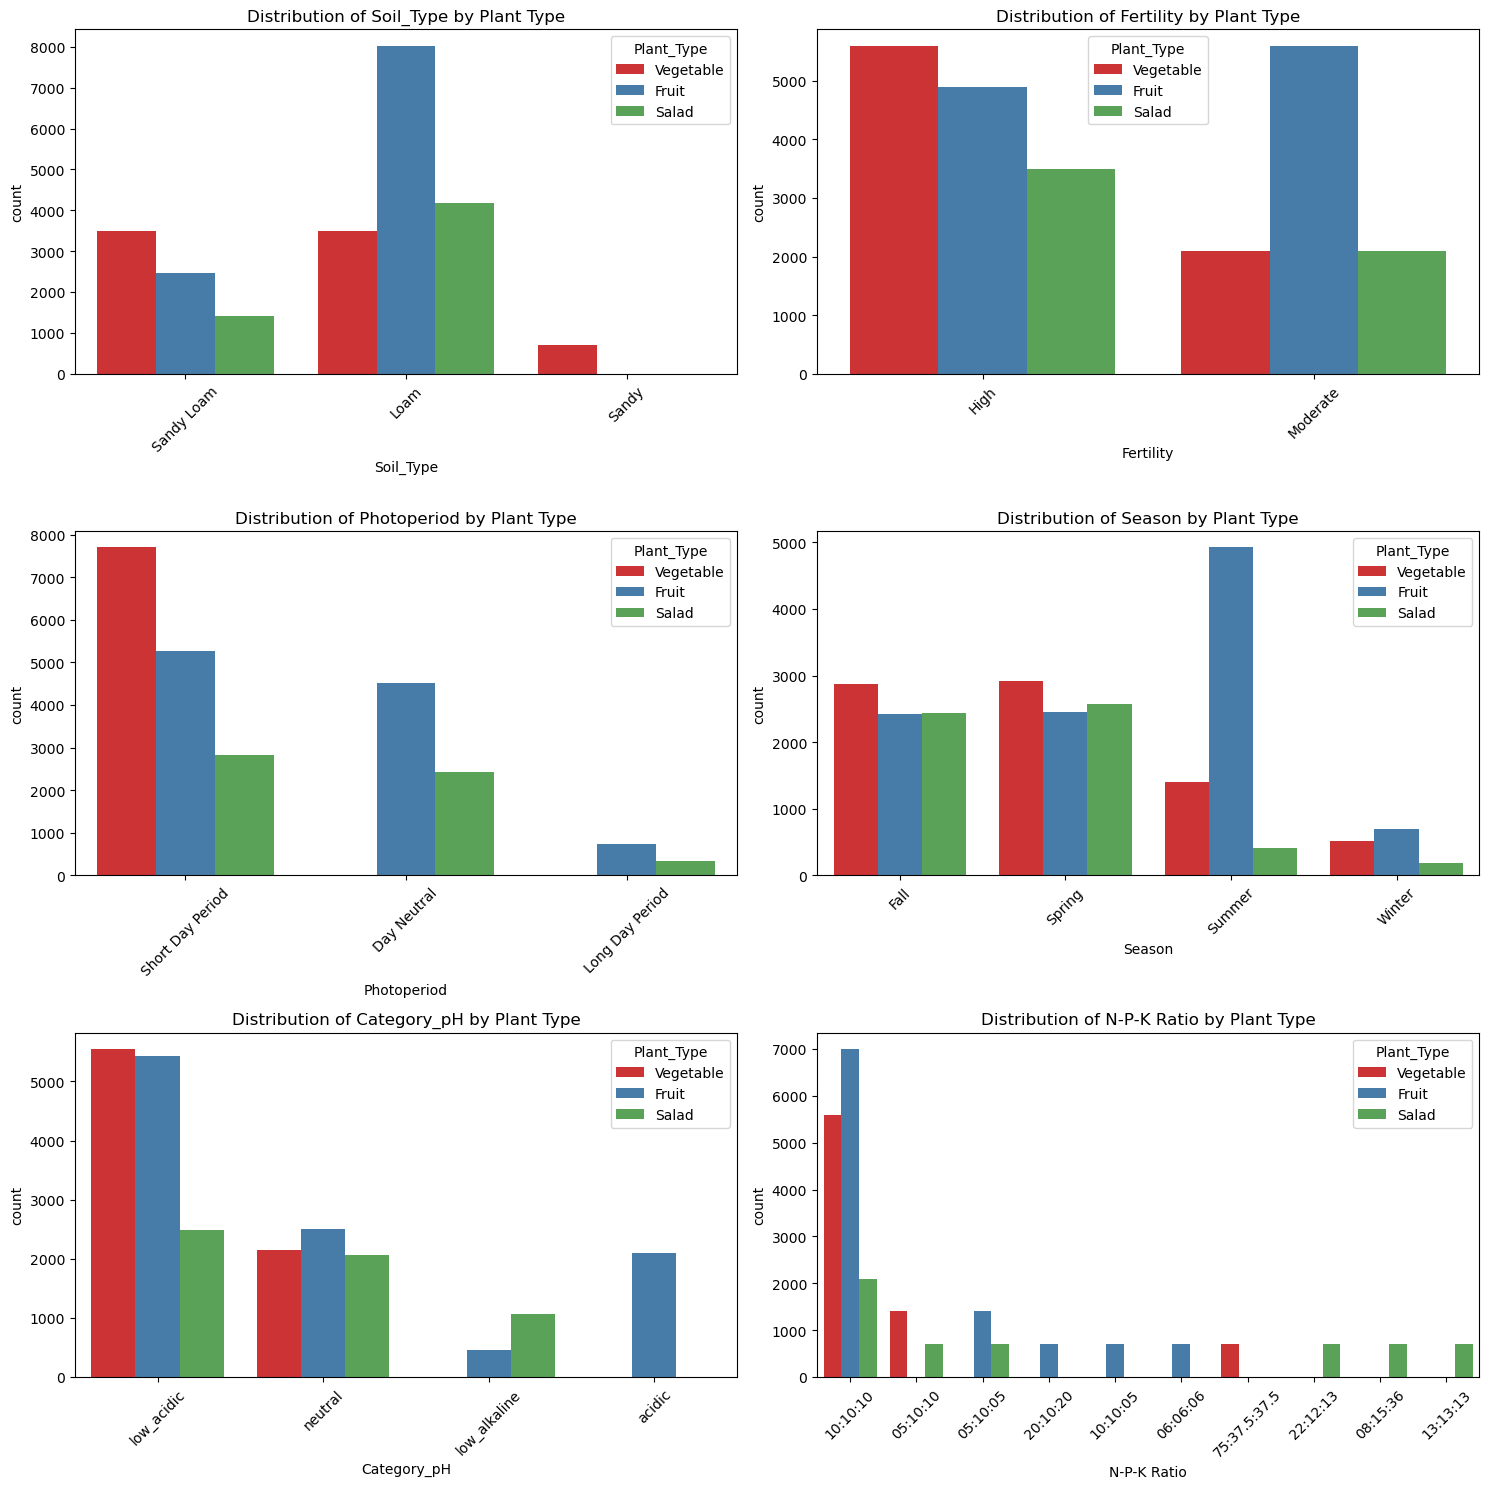

In [47]:
categorical_columns = ['Soil_Type', 'Fertility', 'Photoperiod', 'Season', 'Category_pH', 'N-P-K Ratio']


# Define the grid size based on the number of categorical variables
grid_size = len(categorical_columns)
cols = 2
rows = (grid_size + 1) // cols

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

# Plotting the distribution of plant types across categorical variables in a grid
for i, cat in enumerate(categorical_columns):
    row, col = divmod(i, cols)
    sns.countplot(data=df_700, x=cat, hue='Plant_Type', ax=axes[row, col], palette='Set1')
    axes[row, col].set_xticklabels(axes[row, col].get_xticklabels(), rotation=45)
    axes[row, col].set_title(f'Distribution of {cat} by Plant Type')

# Adjust layout
plt.tight_layout()
plt.show()

In [49]:
#crosstabulation
for cat in categorical_columns:
    crosstab = pd.crosstab(df_700[cat], df_700['Plant_Type'])
    print(f'\nCross-Tabulation of {cat} and Plant_Type:\n')
    print(crosstab)


Cross-Tabulation of Soil_Type and Plant_Type:

Plant_Type  Fruit  Salad  Vegetable
Soil_Type                          
Loam         8027   4189       3500
Sandy           0      0        700
Sandy Loam   2473   1411       3500

Cross-Tabulation of Fertility and Plant_Type:

Plant_Type  Fruit  Salad  Vegetable
Fertility                          
High         4900   3500       5600
Moderate     5600   2100       2100

Cross-Tabulation of Photoperiod and Plant_Type:

Plant_Type        Fruit  Salad  Vegetable
Photoperiod                              
Day Neutral        4516   2427          0
Long Day Period     725    340          0
Short Day Period   5259   2833       7700

Cross-Tabulation of Season and Plant_Type:

Plant_Type  Fruit  Salad  Vegetable
Season                             
Fall         2428   2433       2869
Spring       2456   2569       2921
Summer       4926    415       1401
Winter        690    183        509

Cross-Tabulation of Category_pH and Plant_Type:

Plant_Typ

In [51]:
from scipy.stats import chi2_contingency

In [56]:
#Chi square test for independence
for cat in categorical_columns:
    contingency_table = pd.crosstab(df_700[cat], df_700['Plant_Type'])
    print(contingency_table)
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print("Expected Frequencies:")
    print(ex)
    print(f'Chi-Square Test between {cat} and Plant_Type: p-value = {p}\n')

    # Check if any expected frequencies are below 5
    if (ex < 5).any():
        print(f"Warning: Some expected frequencies are below 5 for {cat}. Chi-square test may not be reliable.")

Plant_Type  Fruit  Salad  Vegetable
Soil_Type                          
Loam         8027   4189       3500
Sandy           0      0        700
Sandy Loam   2473   1411       3500
Expected Frequencies:
[[6933.52941176 3697.88235294 5084.58823529]
 [ 308.82352941  164.70588235  226.47058824]
 [3257.64705882 1737.41176471 2388.94117647]]
Chi-Square Test between Soil_Type and Plant_Type: p-value = 0.0

Plant_Type  Fruit  Salad  Vegetable
Fertility                          
High         4900   3500       5600
Moderate     5600   2100       2100
Expected Frequencies:
[[6176.47058824 3294.11764706 4529.41176471]
 [4323.52941176 2305.88235294 3170.58823529]]
Chi-Square Test between Fertility and Plant_Type: p-value = 4.449382988398966e-280

Plant_Type        Fruit  Salad  Vegetable
Photoperiod                              
Day Neutral        4516   2427          0
Long Day Period     725    340          0
Short Day Period   5259   2833       7700
Expected Frequencies:
[[3063.08823529 1633.647

Summary of Chi square test: 

- Null hypothesis: No association between categorical variable and plant type.
- Alternate Hypothesis: There is a statistically sig. association with plant type and categorical variable.

For all categorical variables and plant type, p < 0.05  and no expected fequences are 0, reject the null hypothesis. There is a statistically significant association between each categorical variable and plant type.




## Continuous Variables

- Temperature (average temperature in degrees Celsius)
- Rainfall (amount of rainfall in millimeters)
- pH (pH level of the soil)
- Light_Hours (number of light hours per day)
- Light_Intensity (intensity of light received in lumens)
- Rh (relative humidity percentage)
- Yield (yield of the vegetable in tons per hectare)
- Nitrogen
- Potassium
- Phosphorus


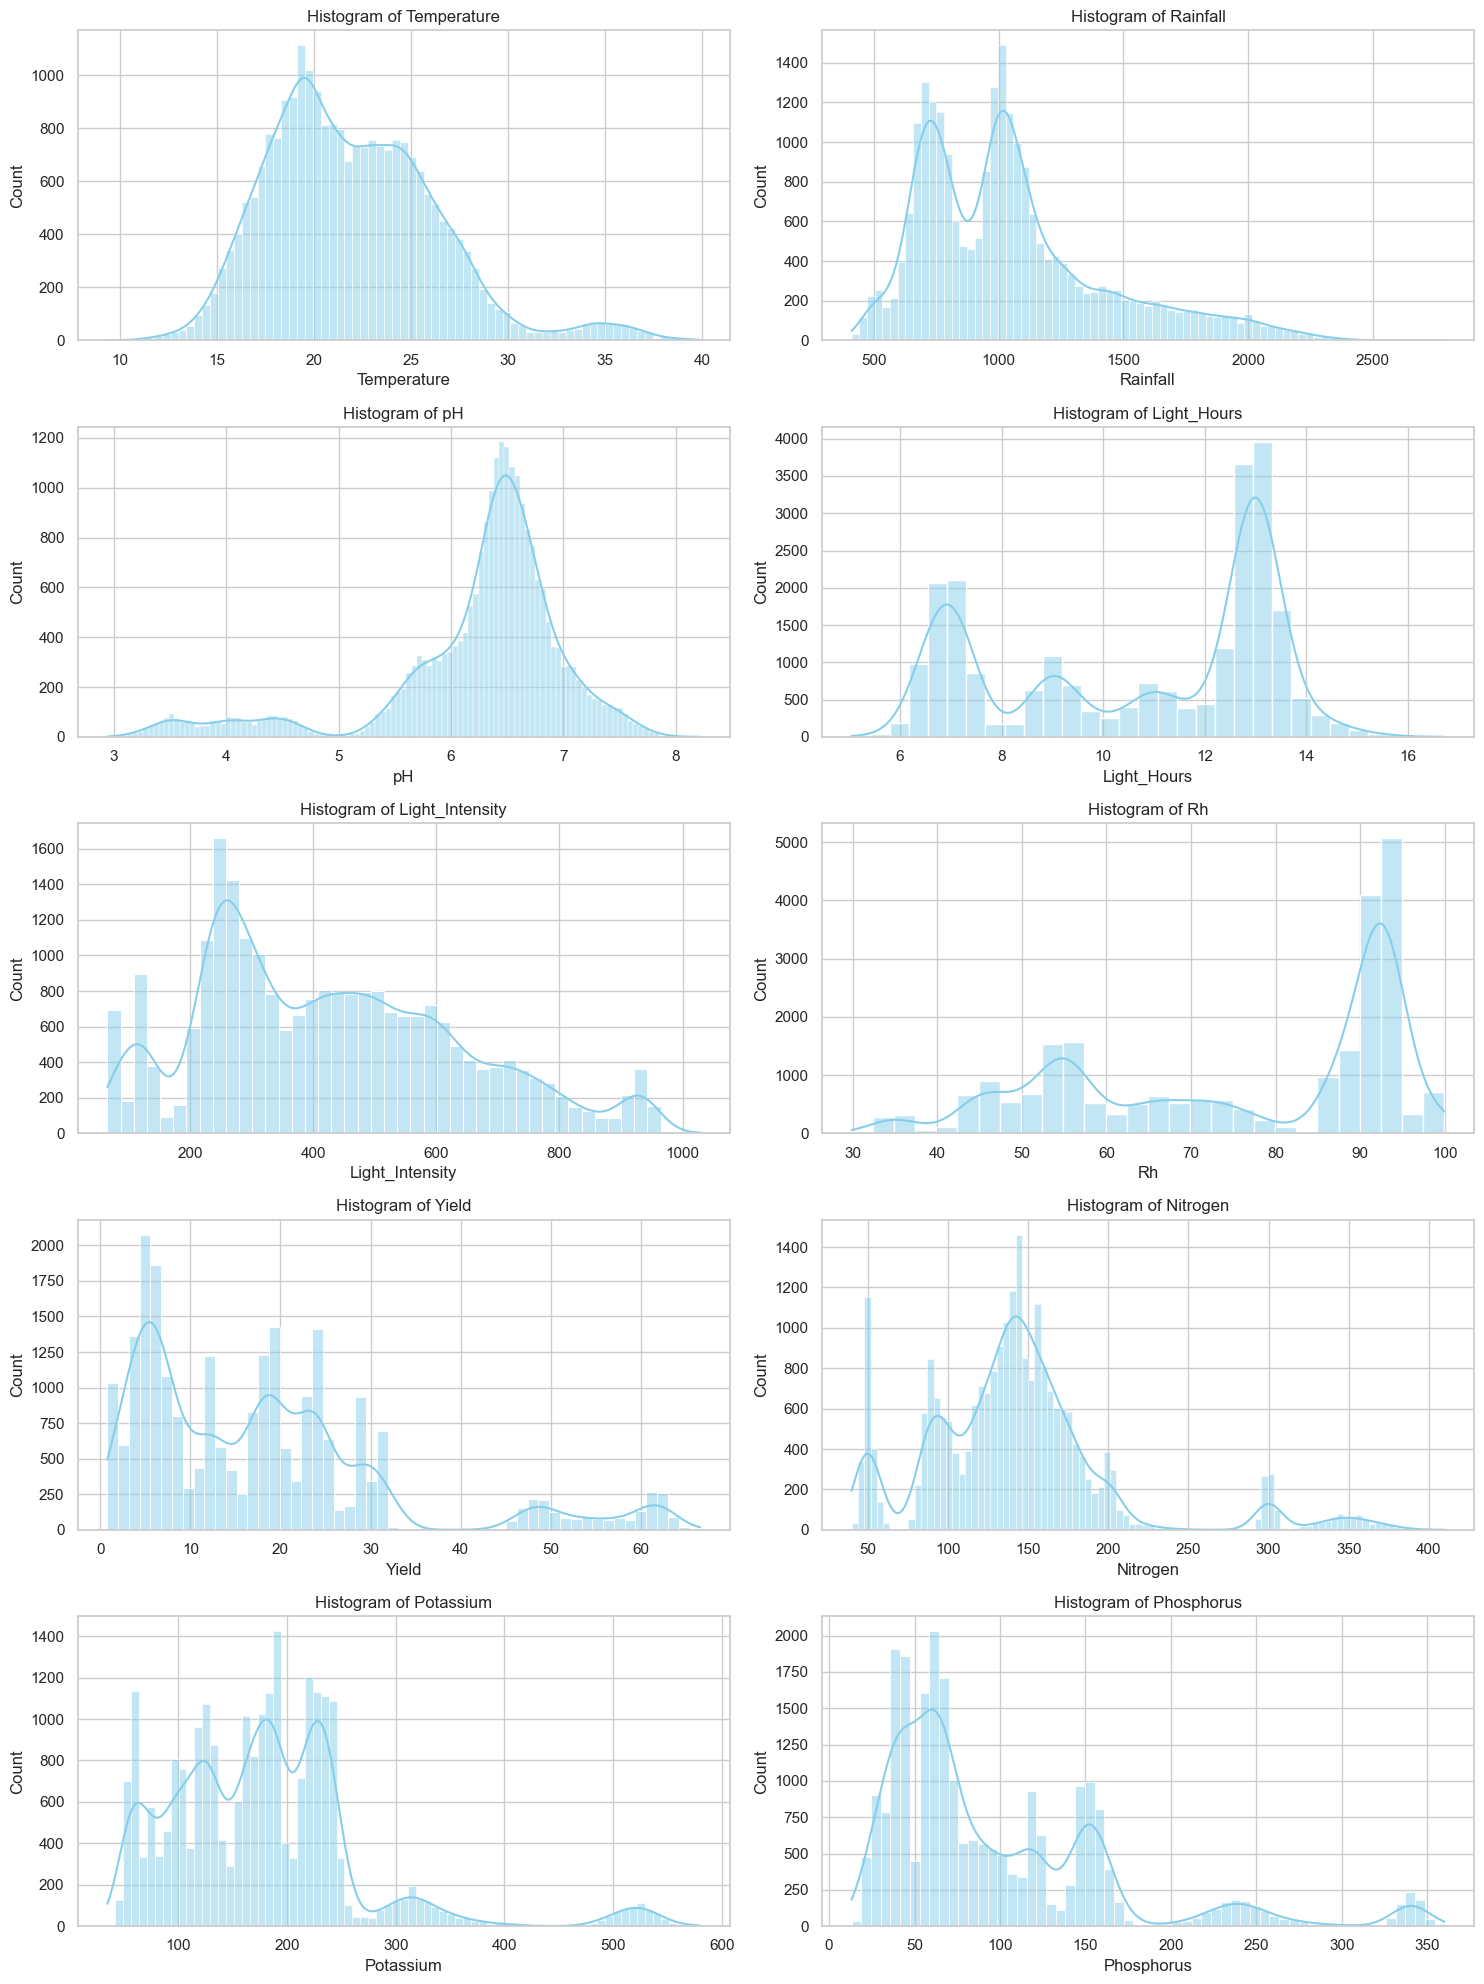

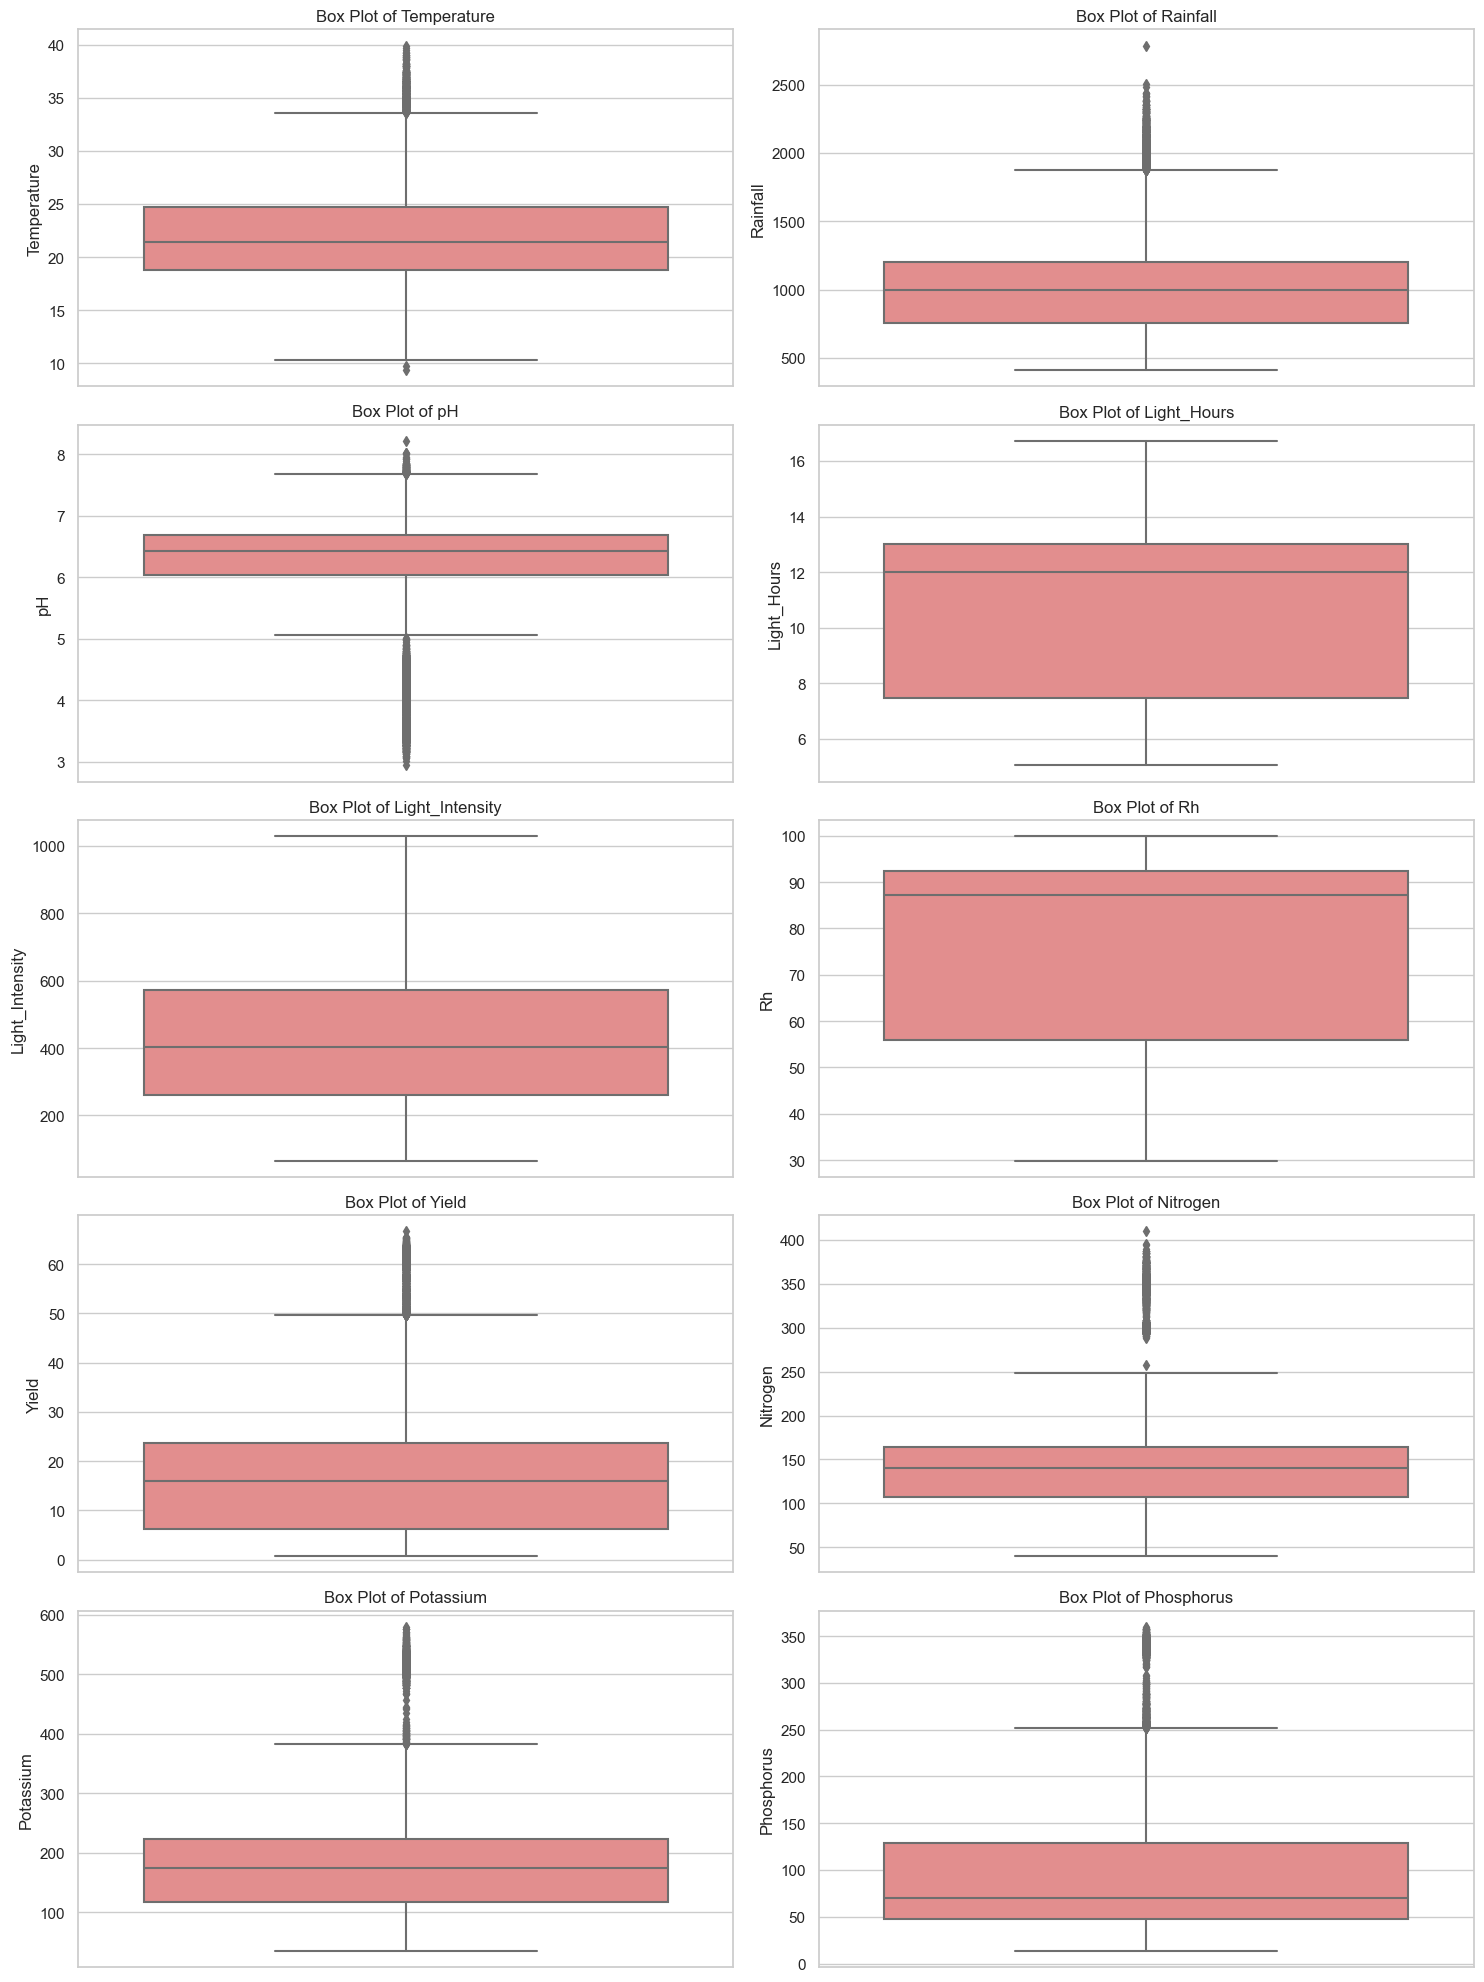

In [57]:
#general distributions across data sat
continuous_columns = [
    'Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 
    'Rh', 'Yield', 'Nitrogen', 'Potassium', 'Phosphorus'
]

#set the style for the plots
sns.set(style="whitegrid")

#number of rows and columns for the grid
n_rows = 5
n_cols = 2

#figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

#Plotting histograms for continuous variables in a grid
for i, col in enumerate(continuous_columns):
    sns.histplot(df_700[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')


plt.tight_layout()
plt.show()

#figure and axes for box plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

#Plotting box plots for continuous variables in a grid
for i, col in enumerate(continuous_columns):
    sns.boxplot(y=df_700[col], color='lightcoral', ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

**Summary of histograms, box plots and descriptive stats, continuous variables**

| Variable         | Mean       | Median     | Std Dev    | Min        | 25%        | 75%        | Max        | Skewness      | Potential Outliers                 |
|------------------|------------|------------|------------|------------|------------|------------|------------|---------------|-------------------------------------|
| Temperature (°C) | 21.98      | 21.42      | 4.38       | 9.36       | 18.80      | 24.73      | 39.91      | Slight right  | Above 39.91°C                      |
| Rainfall (mm)    | 1048.78    | 995.84     | 372.44     | 409.93     | 756.62     | 1204.58    | 2786.34    | Right         | Above 2786.34 mm                   |
| pH               | 6.24       | 6.43       | 0.84       | 2.94       | 6.03       | 6.69       | 8.22       | Slight left   | Below 2.94 or above 8.22           |
| Light Hours      | 10.71      | 12.02      | 2.71       | 5.04       | 7.48       | 13.03      | 16.72      | Slight left   | Below 5.04 or above 16.72 hours    |
| Light Intensity  | 428.14     | 403.60     | 210.59     | 66.00      | 261.00     | 573.61     | 1028.68    | Right         | Above 1028.68 lumens               |
| Relative Humidity| 75.63      | 87.13      | 19.20      | 29.88      | 55.99      | 92.46      | 99.93      | Left          | Below 29.88% or above 99.93%       |
| Yield (tons/ha)  | 143.08     | 140.25     | 60.18      | 40.08      | 107.08     | 163.85     | 409.64     | Right         | Above 409.64 tons/ha               |
| Nitrogen         | 97.73      | 70.56      | 69.56      | 13.16      | 47.21      | 129.06     | 360.04     | Right         | Above 360.04                       |
| Potassium        | 178.38     | 174.46     | 90.68      | 34.98      | 117.86     | 223.65     | 579.95     | Right         | Above 579.95                       |
| Phosphorus       | 17.79      | 15.92      | 14.50      | 0.77       | 6.31       | 23.62      | 66.62      | Right         | Above 66.62                        |

### Notes
- **Skewness**: Indicates the direction of skew in the data distribution.
- **Potential Outliers**: Based on the range, these values might be considered outliers.


## Relationships Across Categorical and Continuos

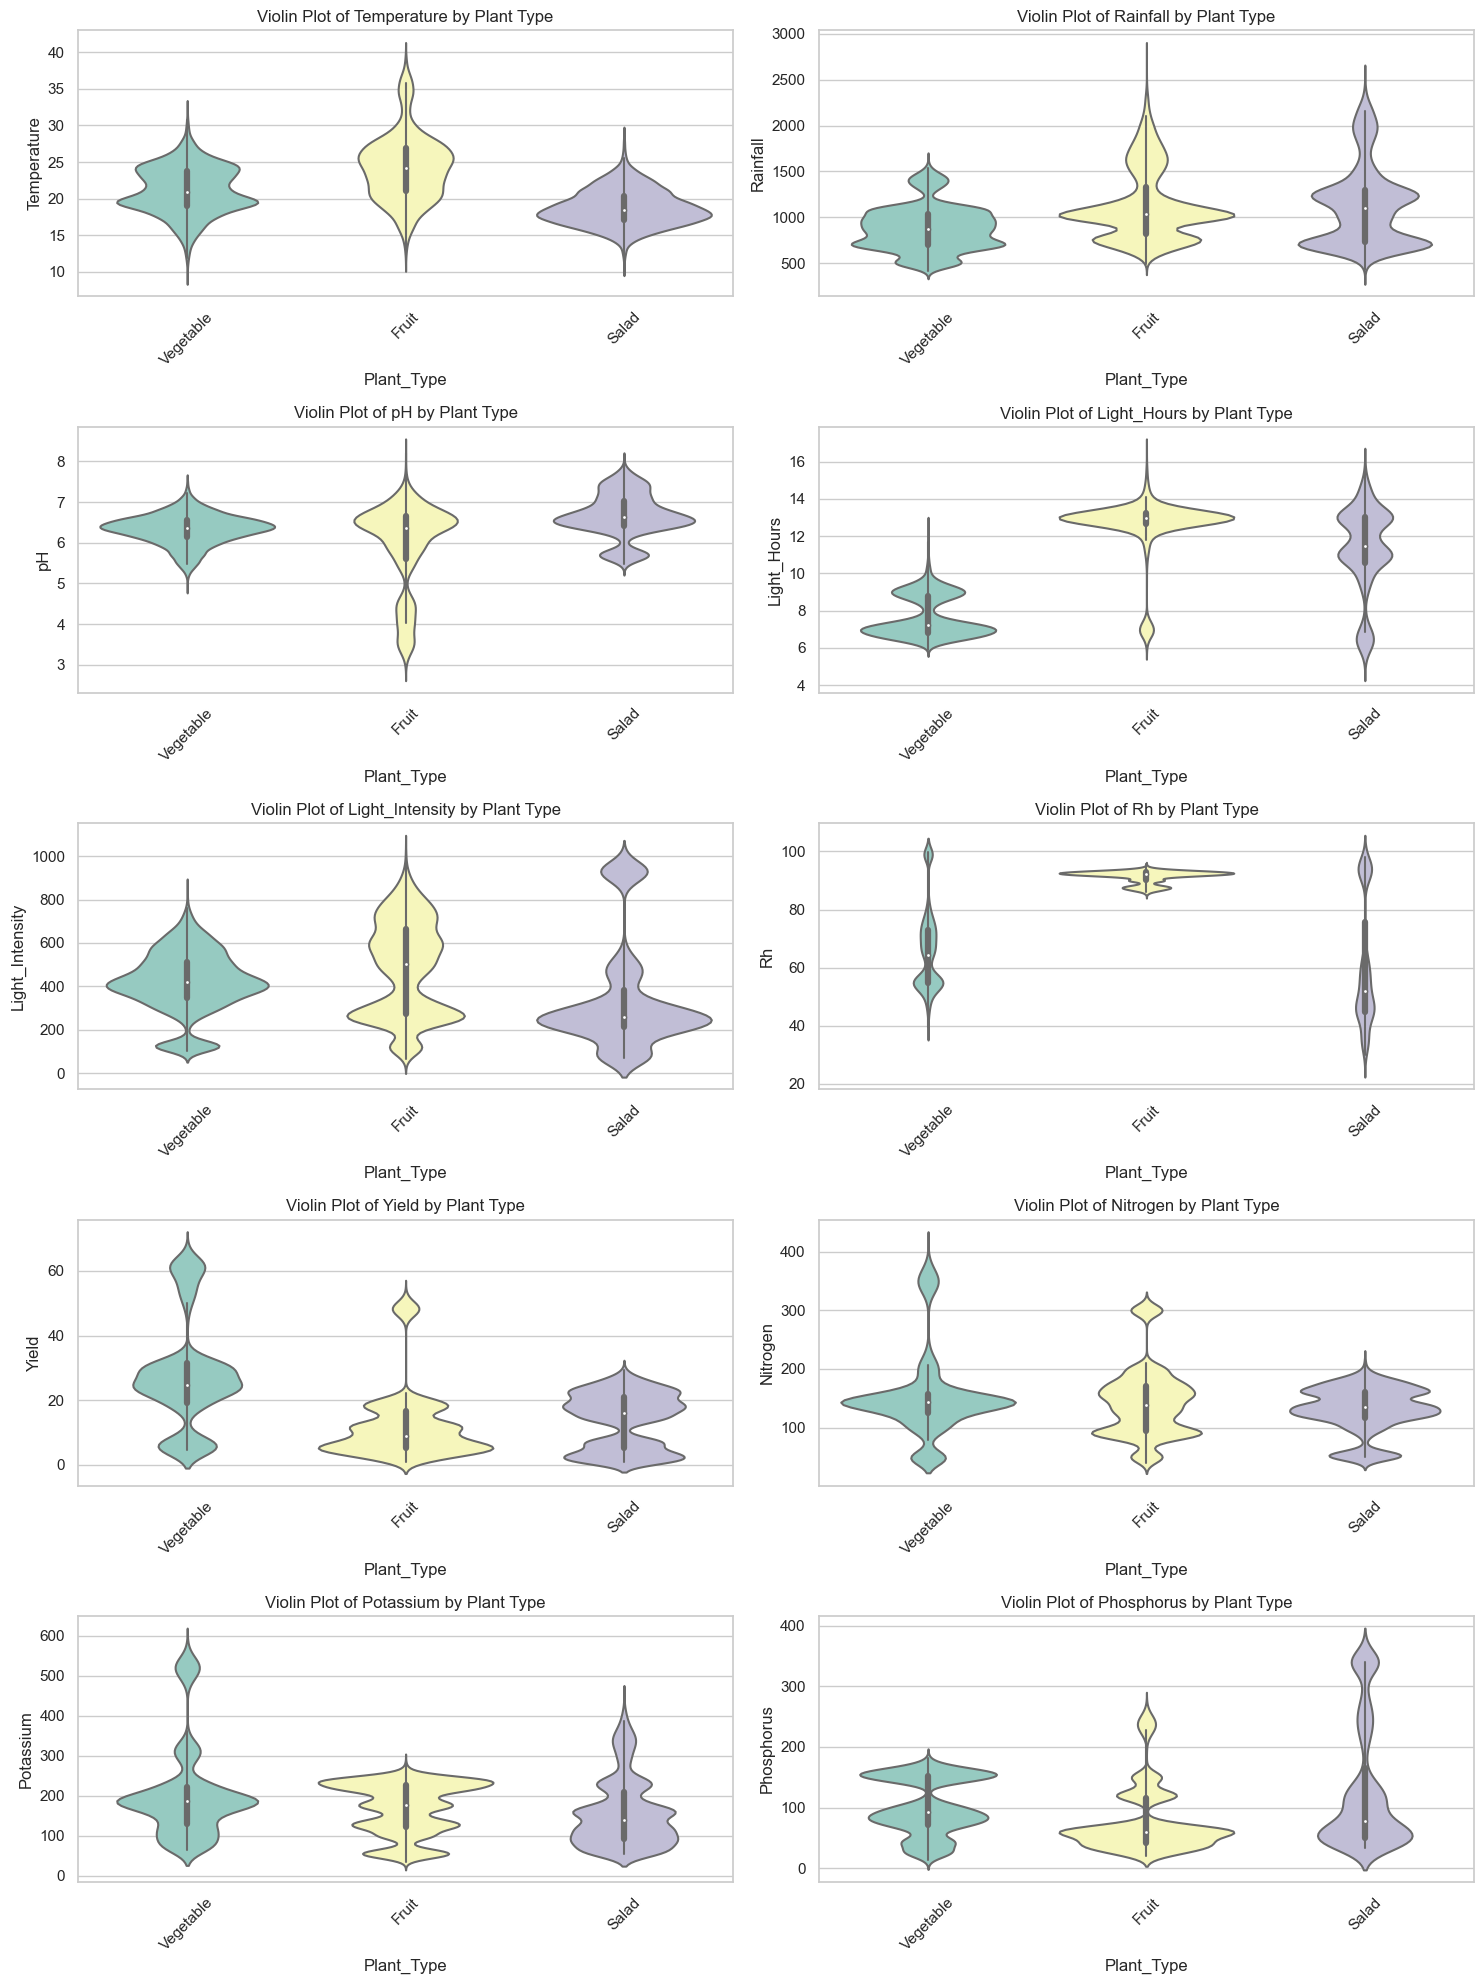

In [60]:
# Plotting violin plots for each continuous variable by plant type
n_rows = 5
n_cols = 2

#Create a figure for the grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 20))
axes = axes.flatten()

# plotting violin plots for each continuous variable by plant type in a grid
for i, col in enumerate(continuous_columns):
    sns.violinplot(x='Plant_Type', y=col, data=df_700, palette='Set3', ax=axes[i])
    axes[i].set_title(f'Violin Plot of {col} by Plant Type')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


#### Interpretation of Violin Plots

#### 1. Temperature
- **Vegetable**: distribution range from 5 degrees Celsius to 35 degrees Celcius. Broad distribution around 20 degrees celcius.  
- **Fruit**: Broader temperature distribution range, higher interquartile range than vegetable. Broad distribution around 26-27 degrees celcius. 
- **Salad**: Range is shorter than vegetables and fruits. Interquartile range and median lower than vegetables and fruits, around 17 degrees celcius. 

#### 2. Rainfall
- **Vegetable**: Generally lower rainfall requirements, with a high density around 1000 mm.
- **Fruit**: Higher rainfall requirements, with a broader spread and some peaks around 1000 and 1700 mm.
- **Salad**: Similar to fruits but with a slightly higher variation in interquartile range and higher median.

#### 3. pH
- **Vegetable**: Prefers slightly acidic to neutral pH (around 6-7).
- **Fruit**: Prefers a wider range of pH values, from acidic to slightly alkaline.
- **Salad**: Similar preference to vegetables, with a slightly higher concentration around neutral pH.

#### 4. Light Hours
- **Vegetable**: Typically grown with moderate light hours (around 7 and 9 hours), lowest median out of the three.
- **Fruit**: Grown under a wider range of light hours, with a peak around 12-14 hours.
- **Salad**: Longer range in distribution of light hours, with higher distributions around 11 and 13.

#### 5. Light Intensity
- **Vegetable**: Requires moderate light intensity, with a concentration around 400-500 lumens.
- **Fruit**: Broader interquartile range of  light intensity requirements, with a broader distribution and peaks around 300 and 500-700 lumens.
- **Salad**: Lowest median out of the three, with peak distribtuion around 300 lumens. 

#### 6. Relative Humidity (Rh)
- **Vegetable**: Lower median for Rh than fruits, around 70%. Broader interquartile range, distributions around 50% and then 60%-80%. 
- **Fruit**: Shortest interquartile range. Highest median for Rh out of the three. Highest distribution density around 90%.  
- **Salad**: Longest interquartile range out of the three. Median around 50%.

#### 7. Yield
- **Vegetable**: Shows a high yield potential with a wide range of values, indicating variability in yield.
- **Fruit**: Generally lower yield compared to vegetables, with peak distributions around 10-20 tons/ha.
- **Salad**: Lower yield similar to fruits, with less variation. 

#### 8. Nitrogen
- **Vegetable**: Borader range, with peaks around 100-150 ppm.
- **Fruit**: Slightly higher nitrogen requirements, with peaks around 120-180 ppm.
- **Salad**: Similar to vegetables but shorter range, peaks between 100-200 ppm. 

#### 9. Potassium
- **Vegetable**: Broader range (50-600 ppm), Higher potassium requirements, with peaks around 150-250ppm. Median close to 200 ppm. 
- **Fruit**: Distributions around 50-300 ppm with various peaks, similar median to vegetables close to 200.
- **Salad**: Range of distribution between veg and fruit, most of the distribution around lower range, 30-150 ppm. Median around 140 ppm. 

#### 10. Phosphorus
- **Vegetable**: Median close to 100 ppm.
- **Fruit**: Slightly longer distribution range than veg, lower median aroun 50 ppm. 
- **Salad**: Longest distribution range out of the three, median is similar slightly higher than fruits around 70 ppm. 

### Key Takeaways:

- **Temperature, Rainfall, Light Hours, and Light Intensity**: 
  - **Fruits** generally have broader and higher requirements compared to vegetables and salads.
  - **Vegetables** have moderate requirements with more consistent conditions.
  - **Salads** have the lowest requirements with shorter ranges and lower medians.

- **Soil pH**: 
  - **Fruits** can tolerate a wider range of pH levels from acidic to slightly alkaline.
  - **Vegetables** and **salads** prefer slightly acidic to neutral pH, with vegetables having a more concentrated range.

- **Relative Humidity**: 
  - **Fruits** prefer higher relative humidity compared to vegetables and salads.
  - **Vegetables** and **salads** have broader ranges but lower medians.

- **Nutrient Requirements (Nitrogen, Potassium, Phosphorus)**: 
  - **Vegetables** and **fruits** have higher and broader nutrient requirements compared to salads.
  - **Salads** generally require lower nutrient levels.

- **Yield**: 
  - **Vegetables** show a higher potential yield with more variation.
  - **Fruits** and **salads** have lower, more consistent yields.





### Correlation Analysis

**Encode certain Categorical variables:** Name, Soil Type, Season and Fertility. Photo period is represented by light hours, NPK ratio is the ideal NPK ratio for plant. Seperate N, P, and K values are given as continous variables. ** (how is N,P and K derived here?). pH categorical is represented as continuous variable. 

In [63]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [76]:
df_700['Fertility'].value_counts()

Fertility
High        14000
Moderate     9800
Name: count, dtype: int64

In [77]:
#Binarize Fertility
df_700['Fertility_Binary'] = df_700['Fertility'].map({'Moderate': 0, 'High': 1})

#Initialize OneHotEncoder
onehotencoder = OneHotEncoder()

#Encode Soil_Type
encoded_soil_type = onehotencoder.fit_transform(df_700[['Soil_Type']]).toarray()
encoded_soil_type_df = pd.DataFrame(encoded_soil_type, columns=onehotencoder.get_feature_names_out(['Soil_Type']))

#Encode Season
encoded_season = onehotencoder.fit_transform(df_700[['Season']]).toarray()
encoded_season_df = pd.DataFrame(encoded_season, columns=onehotencoder.get_feature_names_out(['Season']))

#Encode Name
encoded_name = onehotencoder.fit_transform(df_700[['Name']]).toarray()
encoded_name_df = pd.DataFrame(encoded_name, columns=onehotencoder.get_feature_names_out(['Name']))

#Encode Plant_Type
encoded_plant_type = onehotencoder.fit_transform(df_700[['Plant_Type']]).toarray()
encoded_plant_type_df = pd.DataFrame(encoded_plant_type, columns=onehotencoder.get_feature_names_out(['Plant_Type']))

#Concatenate encoded variables with the original DataFrame
df_encoded = pd.concat([df_700, encoded_soil_type_df, encoded_season_df, encoded_name_df, encoded_plant_type_df], axis=1)

#Drop original categorical columns and the specified columns
df_encoded.drop(['Soil_Type', 'Season', 'Fertility', 'Name', 'Plant_Type', 
                 'Photoperiod', 'Category_pH', 'N-P-K Ratio'], axis=1, inplace=True)


In [78]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23800 entries, 0 to 23799
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S. no.                23800 non-null  int64  
 1   Temperature           23800 non-null  float64
 2   Rainfall              23800 non-null  float64
 3   pH                    23800 non-null  float64
 4   Light_Hours           23800 non-null  float64
 5   Light_Intensity       23800 non-null  float64
 6   Rh                    23800 non-null  float64
 7   Nitrogen              23800 non-null  float64
 8   Phosphorus            23800 non-null  float64
 9   Potassium             23800 non-null  float64
 10  Yield                 23800 non-null  float64
 11  Fertility_Binary      23800 non-null  int64  
 12  Soil_Type_Loam        23800 non-null  float64
 13  Soil_Type_Sandy       23800 non-null  float64
 14  Soil_Type_Sandy Loam  23800 non-null  float64
 15  Season_Fall        

In [82]:
#function to calculate p-values for the correlation matrix
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    pvalues = pd.DataFrame(np.zeros((df.shape[1], df.shape[1])), columns=df.columns, index=df.columns)
    for col in df.columns:
        for row in df.columns:
            if col != row:
                pvalues[col][row] = pearsonr(df[col], df[row])[1]
            else:
                pvalues[col][row] = np.nan
    return pvalues


In [84]:
from scipy.stats import pearsonr

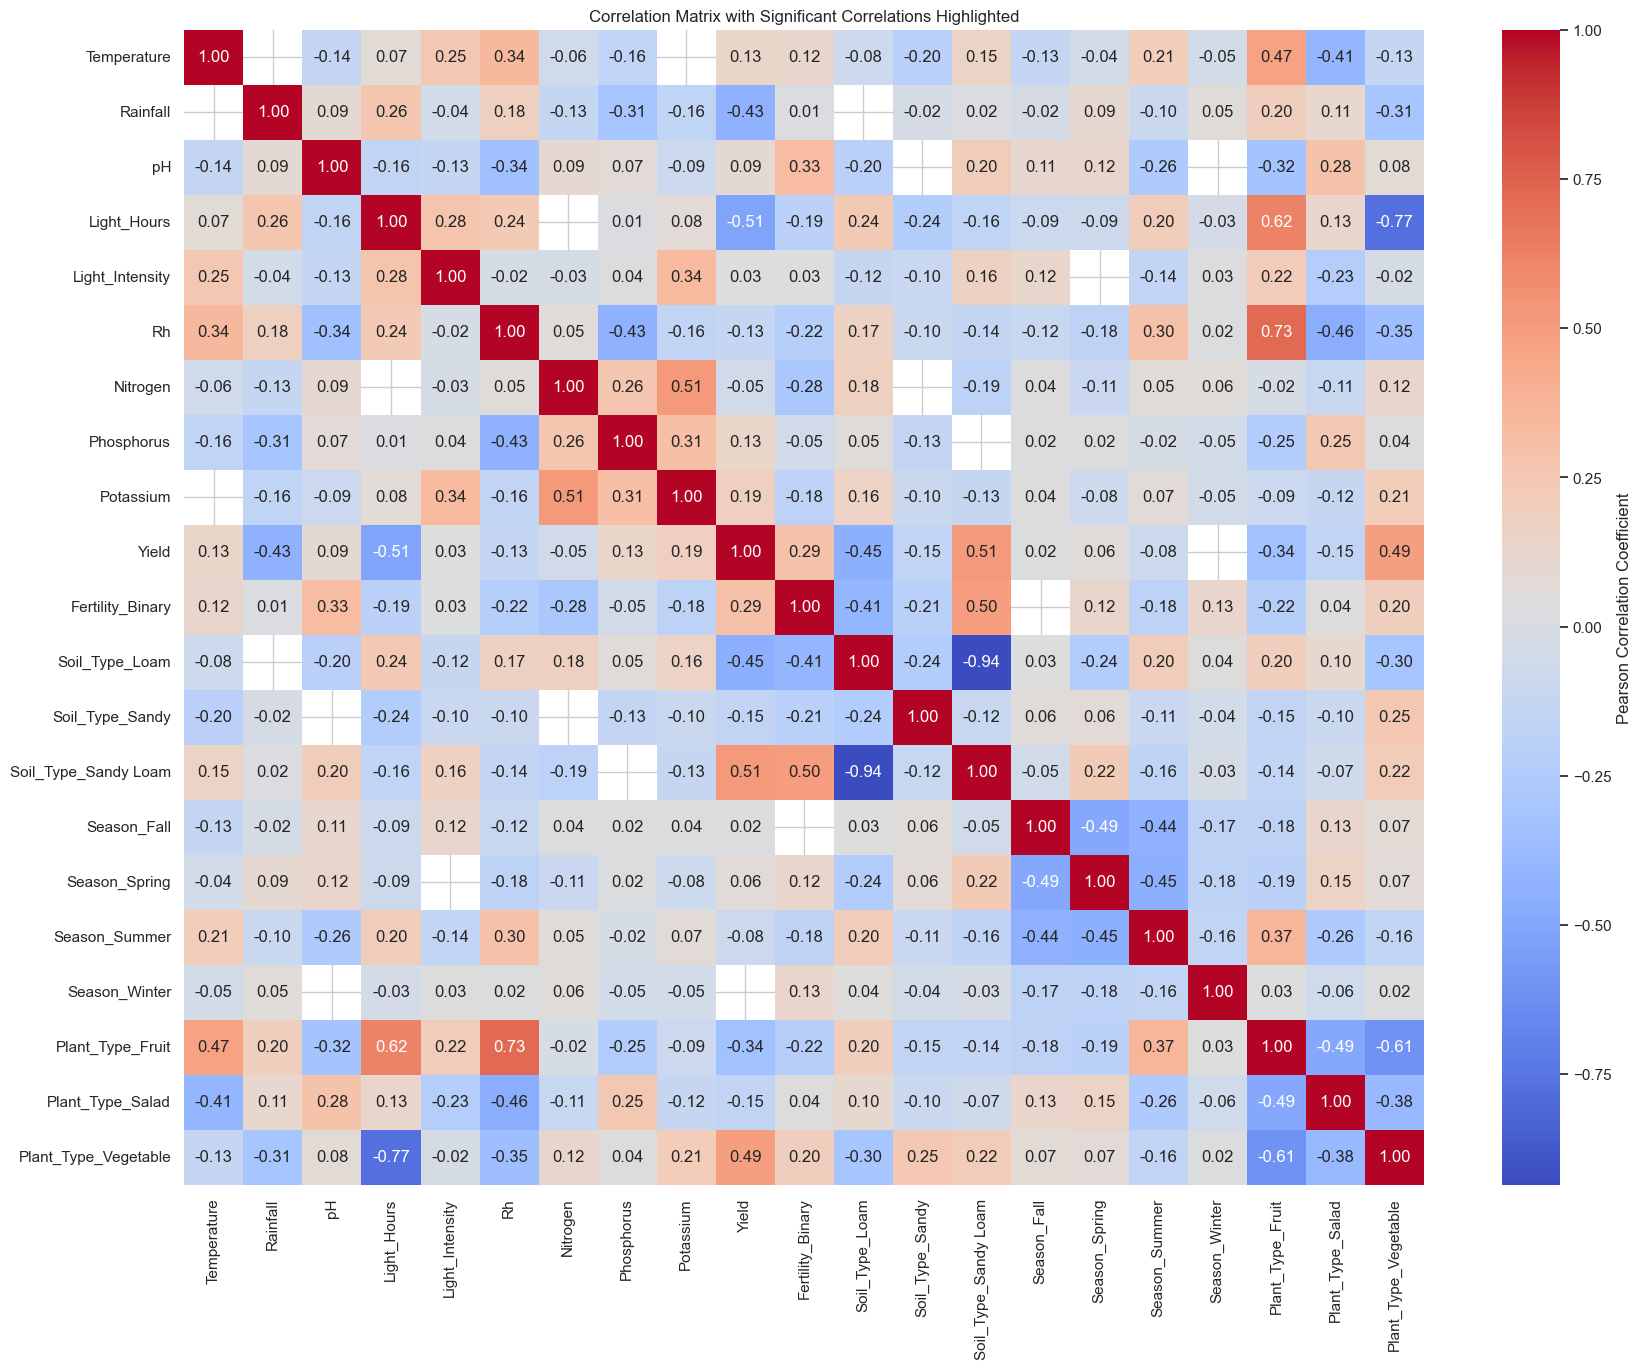

In [87]:
#calculate correlation matrix
#filter out plant names -> corr matrix unreadable
encoded_plant_name_columns = [col for col in df_encoded.columns if 'Name_' in col]
columns_to_drop = encoded_plant_name_columns + ['S. no.']
filtered_df = df_encoded.drop(columns=columns_to_drop)

#calculate correlation matrix
correlation_matrix = filtered_df.corr()

#calculate p-values
pvalues = calculate_pvalues(filtered_df)

#mask insignificant correlations (p-value > 0.05)
significance_level = 0.05
mask = pvalues > significance_level

#plotting the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, 
            cbar_kws={"label":"Pearson Correlation Coefficient"})
plt.title('Correlation Matrix with Significant Correlations Highlighted')
plt.savefig('significant_correlation_matrix.png')
plt.show()


### Key Insights from the Correlation Matrix

#### Strong Positive Correlations

| Variable 1             | Variable 2             | Correlation |
|------------------------|------------------------|-------------|
| Rh                     | Plant_Type_ Fruit                  | 0.73      |
| Plant_Type_Fruit | Temperature | 0.47 |
| Plant_Type_Fruit       | Light Hours          | 0.62       |
| Plant_Type_Vegetable   | Yield                  | 0.49        |
| Soil_Type_Sandy_Loam           | Yield                  | 0.51        |

**Positive Correlations notes:**
- light hours is correlated with light intensity




#### Strong Negative Correlations

| Variable 1             | Variable 2             | Correlation |
|------------------------|------------------------|-------------|
| Yield | Light_Hours | -0.51 |
|Yield | Rainfall | -0.43 |
| Phosphorous       | Rh                 | -0.43      |
| Plant_Type_Vegetable   | Light_Hours            | -0.77      |
| Plant_Type_Salad       | Temperature            | -0.41       |

**Negative Correlation Notes**
- Plant types show negative correlations


### Notable Observations

- Yeild Correlations: 
   - Only Sandy Loam shows positive correlation with yield, the other two show a negative correlation. 
   - Yield negatively correlated with light hours and rainfall suggesting as these increase yield decreases.  
- Plant Type and Environment (not including soil)
   - Plant_Type_Fruit show positive strong correlations with Rh, Temp and light hours 
   - Plant_Type_Vegetable has a strong positive correlation with Yield (0.49) but a strong negative correlation with Light_Hours (-0.77), suggesting that vegetables yield more under specific light conditions which might be shorter light hours.
   - Plant_Type_Salad has a negative correlation with Temperature (-0.41), indicating that salads prefer cooler temperatures.
- Nutrient Correlations:
   - Phosphorus has a moderate negative correlation with Rh (-0.43), indicating a possible inverse relationship between soil phosphorus levels and relative humidity.
   - Nitrogen (N), Phosphorus (P), and Potassium (K) show inter-correlations, suggesting that these nutrients are closely related and might collectively impact plant growth. ( Not sure how NPK was generated in data set.)
   - N, P, K show more moderate/ weaker correlations with yield. 




## PCA to Assess Variables that Explain most of Variance in Continuous Variables

In [90]:
features = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Potassium', 'Phosphorus']
x = df_700[features]

#standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [91]:
pca = PCA(n_components= 0.8)  #set to float 0.8 to get components that capture 80% of variance in data. 
principal_components = pca.fit_transform(x_scaled)

#create a df with the principal components
pca_df = pd.DataFrame(data=principal_components,
                       columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])])

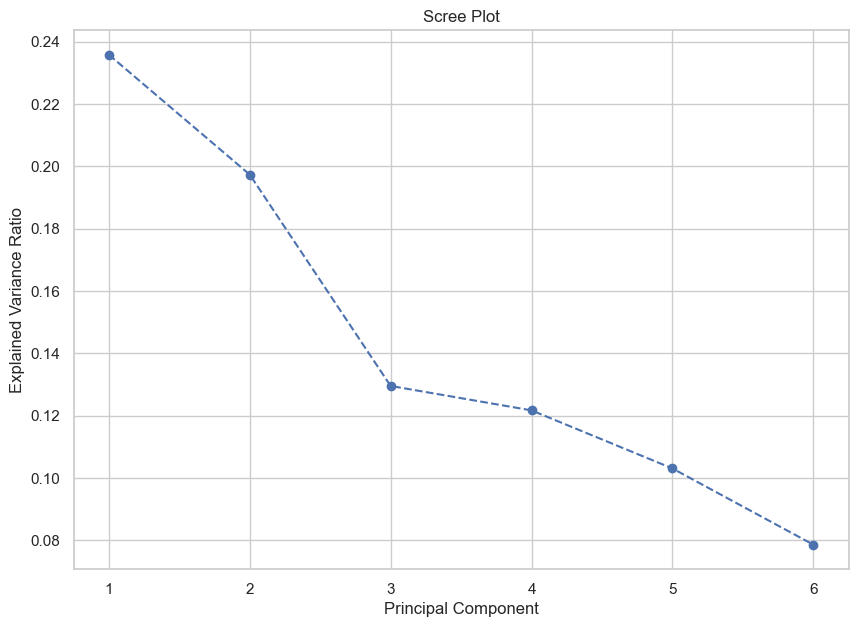

In [99]:
#create scree plot
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [95]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = pca.explained_variance_ratio_.cumsum()
for i, (variance, cumulative) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f'Principal Component {i+1}: Explained variance = {variance * 100:.2f}%, Cumulative variance = {cumulative * 100:.2f}%')

Principal Component 1: Explained variance = 23.59%, Cumulative variance = 23.59%
Principal Component 2: Explained variance = 19.74%, Cumulative variance = 43.32%
Principal Component 3: Explained variance = 12.95%, Cumulative variance = 56.28%
Principal Component 4: Explained variance = 12.17%, Cumulative variance = 68.45%
Principal Component 5: Explained variance = 10.30%, Cumulative variance = 78.75%
Principal Component 6: Explained variance = 7.86%, Cumulative variance = 86.61%


In [96]:
#Get Loadings, coeffs on linear combinations
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#df of loadings
loading_df = pd.DataFrame(loadings, columns=[f'Principal Component {i+1}' for i in range(principal_components.shape[1])], index=features)

#display the loadings
print(loading_df)

                 Principal Component 1  Principal Component 2  \
Temperature                  -0.388386               0.434745   
Rainfall                     -0.485078              -0.075498   
pH                            0.292735              -0.468422   
Light_Hours                  -0.270600               0.512953   
Light_Intensity               0.027652               0.661039   
Rh                           -0.680468               0.349337   
Nitrogen                      0.502138               0.368045   
Potassium                     0.564427               0.624264   
Phosphorus                    0.737060               0.122687   

                 Principal Component 3  Principal Component 4  \
Temperature                  -0.353817              -0.108571   
Rainfall                      0.696123               0.172752   
pH                            0.404127               0.050569   
Light_Hours                   0.570482              -0.107274   
Light_Intensity         

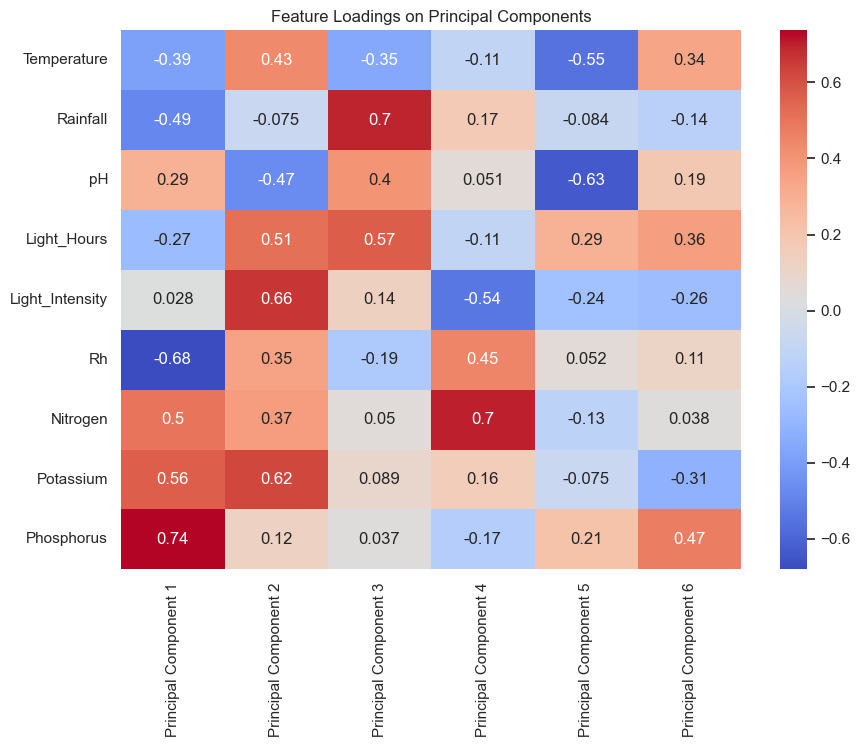

In [97]:
plt.figure(figsize=(10, 7))
sns.heatmap(loading_df, annot=True, cmap='coolwarm')
plt.title('Feature Loadings on Principal Components')
plt.show()

From the scree plot, it is evident that the first three principal components capture a significant portion of the variance in the data. Specifically, these components explain a large percentage of the total variance, as indicated by the steep decline in the explained variance ratio. Based on the feature loadings all features contribute to the first 3 components, variables with high absolute loadings > 0.60 are Rh, Phosphorous, Potassium and Light intensity. 

In [100]:
from mpl_toolkits.mplot3d import Axes3D

   Principal Component 1  Principal Component 2  Principal Component 3  \
0               2.098486               0.472519              -1.389170   
1               2.209929               0.255704              -1.228105   
2               2.070241               0.376250              -1.526575   
3               2.245779               0.420345              -1.383157   
4               1.887290               0.206764              -1.349592   

   Principal Component 4  Principal Component 5  Principal Component 6  \
0              -0.866811              -0.515176              -0.925486   
1              -1.006823              -0.683845              -0.574763   
2              -0.679492              -0.190323              -0.521484   
3              -1.146162              -0.465382              -0.652495   
4              -1.047808              -0.607365              -0.471742   

  Plant_Type  Plant_Type_Code  
0  Vegetable                0  
1  Vegetable                0  
2  Vegetable  

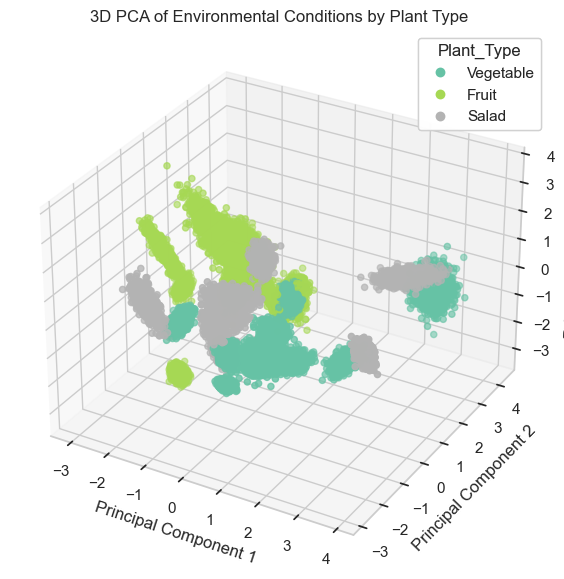

In [105]:
pca_df['Plant_Type'] = df_700['Plant_Type']

# Mapping plant types to colors
plant_type_colors = {plant_type: code for code, plant_type in enumerate(pca_df['Plant_Type'].unique())}
pca_df['Plant_Type_Code'] = pca_df['Plant_Type'].map(plant_type_colors)

# Verify that 'Plant_Type_Code' has been added
print(pca_df.head())

# 3D scatter plot for the first three principal components with actual plant type labels
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'], 
                     c=pca_df['Plant_Type_Code'], cmap='Set2')

# Create a custom legend
legend_labels = pca_df['Plant_Type'].unique()
handles = scatter.legend_elements()[0]
legend = ax.legend(handles, legend_labels, title="Plant_Type")
ax.add_artist(legend)

# Plot title and axis labels
ax.set_title('3D PCA of Environmental Conditions by Plant Type')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### Observations

1. **Clusters and Groupings**:
   - **Vegetables (Blue)**: Tend to cluster towards the center of the plot with some spread along all three components. This suggests that vegetables have a wide range of conditions but tend to share common characteristics.
   - **Fruits (Green)**: Form distinct clusters, especially along PC2 and PC3. This indicates that fruits have more specific environmental conditions compared to vegetables.
   - **Salads (Gray)**: Also form clusters, primarily separated along PC1. This suggests that salads have different environmental conditions compared to vegetables and fruits.

2. **Separation of Plant Types**:
   - **Fruits and Salads**: There is a noticeable separation between fruits and salads, indicating distinct environmental preferences.
   - **Vegetables**: Overlap with both fruits and salads, suggesting that vegetables can tolerate a broader range of conditions.

3. **Spread Along Axes**:
   - **PC1 and PC2**: Show significant spread, indicating that these components capture important variance in environmental conditions for all plant types.
   - **PC3**: Also shows separation but with less variance compared to PC1 and PC2.

### Key Insights

1. **Distinct Environmental Conditions**:
   - Fruits and salads show distinct clusters, indicating that their environmental conditions are different. This could be due to specific requirements for temperature, light intensity, or soil nutrients.

2. **Overlap and Versatility**:
   - Vegetables show overlap with both fruits and salads, suggesting that they are more versatile and can adapt to a wider range of conditions.

3. **Component Contributions**:
   - **PC1**: Likely captures a combination of variables that significantly affect all plant types, such as temperature and light intensity.
   - **PC2 and PC3**: Capture additional variance specific to fruits and salads, possibly related to rainfall, pH, or soil nutrients.



## Comparison Between combined data set of 700 samples and combined data set of 100 samples

In [106]:
from scipy.stats import ttest_ind

In [108]:
#define continuous variables
continuous_variables = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Nitrogen', 'Potassium', 'Phosphorus']

#perform t-test for each continuous variable
t_test_results = {}
for column in continuous_variables:
    t_stat, p_value = ttest_ind(df_700[column], df_100[column], equal_var=False)
    t_test_results[column] = {'t-statistic': t_stat, 'p-value': p_value}

#display results
print("T-Test Results for Each Continuous Variable:")
for column, results in t_test_results.items():
    print(f"{column}: t-statistic = {results['t-statistic']}, p-value = {results['p-value']}")

T-Test Results for Each Continuous Variable:
Temperature: t-statistic = -1.064161121267582, p-value = 0.28731338847952426
Rainfall: t-statistic = 0.020085681510318643, p-value = 0.9839759257272005
pH: t-statistic = 0.09487990357015745, p-value = 0.9244145031348944
Light_Hours: t-statistic = -0.0023514718991403368, p-value = 0.9981239047311836
Light_Intensity: t-statistic = 0.23294196104348036, p-value = 0.8158172430234083
Rh: t-statistic = -0.0022724220726107964, p-value = 0.9981869735112117
Nitrogen: t-statistic = -0.16303388778963548, p-value = 0.8704992101041749
Potassium: t-statistic = 0.03446993962805779, p-value = 0.9725039678448714
Phosphorus: t-statistic = 0.1179997139200175, p-value = 0.9060732238166045


In this case all p vals for T-test are >0.05 , there is no statically significant differences between means of continuous variables between datasets of sample size 100, and sample size 700. This suggests the combined data set of sample size 100 represents the distributions in the larger data set. 

# Summary
**Chi-Square Tests:** All categorical variables show a statistically significant association with plant type, indicating that plant type is influenced by these categorical conditions.

**Continuous Variables Summary**
- Temperature (°C): Mean 21.98, Std Dev 4.38, with fruits requiring broader and higher temperatures.
- Rainfall (mm): Mean 1048.78, Std Dev 372.44, with fruits needing more rainfall compared to vegetables and salads.
- pH: Mean 6.24, Std Dev 0.84, with fruits tolerating a wider pH range.
- Light Hours: Mean 10.71, Std Dev 2.71, with vegetables needing moderate light hours.
- Light Intensity (lumens): Mean 428.14, Std Dev 210.59, with fruits requiring higher light intensity.
- Relative Humidity (%): Mean 75.63, Std Dev 19.20, with fruits preferring higher humidity.
- Yield (tons/ha): Mean 143.08, Std Dev 60.18, with vegetables showing higher potential yield.
- Nutrient Requirements:
- Nitrogen: Mean 97.73, Std Dev 69.56
- Potassium: Mean 178.38, Std Dev 90.68
- Phosphorus: Mean 17.79, Std Dev 14.50

**Yield Correlations:** Positive correlation with Sandy Loam soil type, negative correlations with light hours and rainfall.


**Key Takeaways by Plant Type**
Fruits:

- Prefer broader and higher temperature, more rainfall, higher light intensity, and higher humidity.
  Can tolerate wider pH ranges from acidic to slightly alkaline.
Vegetables:

- Moderate requirements, consistent conditions.
  Higher potential yield with specific light conditions (shorter light hours preferred).
  More versatile in soil types but yield better in Sandy Loam.
Salads:

- Lower requirements for temperature, rainfall, light intensity, and nutrients.
  Prefer cooler temperatures.

**Principal Component Analysis (PCA):**

- First three components explain significant variance, with high loadings on Rh, Phosphorus, Potassium, and Light Intensity.
- Clusters: Vegetables show wide range adaptability, while fruits and salads show distinct environmental preferences.
- Versatility: Vegetables overlap with fruits and salads, indicating broad adaptability.

**Sample Size Comparison:**

- No significant difference between means of continuous variables between datasets of sample size 100 and 700 (p > 0.05).
  The smaller dataset represents distributions of the larger dataset well.

 ## Next Steps:

 - If needed a more in depth EDA of conditions needed for specific plants, but this may be done with modelling. 
 - Feature importance and feature selection and engineering, may also be done in modelling
 - Baseline modelling to gain more insight
 